In [ ]:
#pandas, the python library for representing dataframes, tabular, 2-d structures that represent datasets

In [ ]:
#Pandas provides a Series object that is very similar to a numpy array, but with some additional functionality.

In [1]:
import pandas as pd

In [ ]:
#Series are columns (or 1D numpy array), rows are observations. Series are mutable.

In [55]:
numbers = [1,2,3,4,5,6,7,8,9]

In [56]:
numbers = pd.Series(numbers)

In [57]:
type(numbers)

pandas.core.series.Series

In [2]:
series = pd.Series([100,43,26,17])

In [58]:
numbers.index

RangeIndex(start=0, stop=9, step=1)

In [63]:
pd.core.series.Series #what is this?
series.astype(float) - change the type

0    100.0
1     43.0
2     26.0
3     17.0
dtype: float64

In [ ]:
# A series contains several additional pieces of meta-information that a list does not:

# an index, a way to reference items in the series. This is the numbers 0-3 in our example above

# a dtype, the data type of the elements in the series, this is int64 in our example above, and the dtype was inferred from the data we used.

# Pandas has several main datatypes we will work with:

# int: integer, whole number values
# float: decimal numbers
# bool: true or false values
# object: strings
# category: a fixed set of string values
# a name, an optional human-friendly name for the series

In [6]:
series.name = 'My Numbers'
series

0    100
1     43
2     26
3     17
Name: My Numbers, dtype: int64

In [7]:
series.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
series.dtype

dtype('int64')

In [ ]:
#Notice what happens when we create a series of other data types:

In [13]:
series = pd.Series([1,2,2.718,3.14159, 4])

series

0    1.00000
1    2.00000
2    2.71800
3    3.14159
4    4.00000
dtype: float64

In [16]:
series = pd.Series(['a','b','c'])
series.name = "My Letters"
series

0    a
1    b
2    c
Name: My Letters, dtype: object

In [ ]:
#Like numpy arrays, pandas series are vectorized by default, for example, we can easily use the basic arithmatic 
#operators to manipulate every element in the series.

In [17]:
series = pd.Series([100,43,26,17])
series

0    100
1     43
2     26
3     17
dtype: int64

In [18]:
series + 1

0    101
1     44
2     27
3     18
dtype: int64

In [19]:
series / 2

0    50.0
1    21.5
2    13.0
3     8.5
dtype: float64

In [20]:
series == 17

0    False
1    False
2    False
3     True
dtype: bool

In [21]:
series > 40

0     True
1     True
2    False
3    False
dtype: bool

In [ ]:
# Series have a number of useful methods that we can use for various sorts of manipulations and transformations.

# We will first look at .any, to check if any value in the series is true, and .all, to check if every value in 
# the series is true. Both will return a boolean value whether or not the condition is met.

In [22]:
(series < 0).any() #like an or statement

False

In [23]:
(series > 0).any()

True

In [24]:
(series > 0).all() # like an and statement

True

In [ ]:
# .value_counts is another handy method that will quickly give us a count of the unique values in a series

In [26]:
series_let = pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a'])
series_let

0    a
1    b
2    a
3    c
4    b
5    a
6    d
7    a
dtype: object

In [64]:
series_let.unique()

array(['a', 'b', 'c', 'd'], dtype=object)

In [ ]:
series_let.value_counts()

In [ ]:
#The .isin method can be used to tell whether or not each value in the series is in a set of known values. 

In [29]:
vowels = list('aeiou')
letters = list('abcdefghijk')
letters_series = pd.Series(letters)
letters_series

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
dtype: object

In [31]:
letters_series.isin(vowels) #boolean mask

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
dtype: bool

In [66]:
import numpy as np

In [67]:
pd.Series(np.arange(100_000))

0            0
1            1
2            2
3            3
4            4
5            5
6            6
7            7
8            8
9            9
10          10
11          11
12          12
13          13
14          14
15          15
16          16
17          17
18          18
19          19
20          20
21          21
22          22
23          23
24          24
25          25
26          26
27          27
28          28
29          29
         ...  
99970    99970
99971    99971
99972    99972
99973    99973
99974    99974
99975    99975
99976    99976
99977    99977
99978    99978
99979    99979
99980    99980
99981    99981
99982    99982
99983    99983
99984    99984
99985    99985
99986    99986
99987    99987
99988    99988
99989    99989
99990    99990
99991    99991
99992    99992
99993    99993
99994    99994
99995    99995
99996    99996
99997    99997
99998    99998
99999    99999
Length: 100000, dtype: int64

In [ ]:
#Descriptive Statistics

In [32]:
{
    'Count': series.count(),
    'Sum': series.sum(),
    'Mean': series.mean()
}

{'Count': 4, 'Sum': 186, 'Mean': 46.5}

In [ ]:
# Sometimes there are more complicated operations that we want to apply to series' elements that go beyond what we 
# can do with the vectorized operations. In this case we can define a function that handles a single value and use 
# the .apply method to apply the function to each element.

In [34]:
series = pd.Series([1,2,3,4,5,6,7,8,9])

In [68]:
series.describe()

count      4.000000
mean      46.500000
std       37.260345
min       17.000000
25%       23.750000
50%       34.500000
75%       57.250000
max      100.000000
dtype: float64

In [35]:
def even_or_odd(n): #referencing, not calling the function

    if n % 2 == 0: #n is actually the numbers from series
        return 'Even'
    else:
        return 'Odd'
series.apply(even_or_odd) #apply takes a function and applies to everything in a series.

0     Odd
1    Even
2     Odd
3    Even
4     Odd
5    Even
6     Odd
7    Even
8     Odd
dtype: object

In [ ]:
#common to see as lambda functions

In [ ]:
def count_g(word):
    return word.count('g')

= #aboslutely equivalent

lambda x : x.count('g') 

In [36]:
series.apply(lambda n: 'even'  if n % 2 == 0 else 'odd')

0     odd
1    even
2     odd
3    even
4     odd
5    even
6     odd
7    even
8     odd
dtype: object

In [ ]:
# In addition to arithmetic, pandas also provides us a way to vectorize string manipulation.

# For example, imagine we have a series of strings and we wanted to lowercase all of them. 
# We know we could use .apply for this:

In [39]:
strings = ['heLLo', 'Codeup', 'stUdenTs']
series_str = pd.Series(strings)
series_str.apply(lambda s: s.lower())

0       hello
1      codeup
2    students
dtype: object

In [ ]:
# Like numpy arrays, we can use a series of boolean values to subset a series.

# For example, to find the values greater than 40:

In [40]:
series = pd.Series([100,43,26,17])

In [42]:
series[series > 40]

0    100
1     43
dtype: int64

In [ ]:
# We can do this with any series of boolean values, as another example, we could get all the vowels from our series 
# of letters like this:

In [43]:
letters_series[letters_series.isin(vowels)]

0    a
4    e
8    i
dtype: object

In [ ]:
# We can use the cut function from pandas to put numerical values into discrete bins.

# We can either specify the number of bins to create, and pandas will create bins with an even size, or we can 
# specify the bins themselves:

In [45]:
s = pd.Series(list(range(15)))
s

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
dtype: int64

In [47]:
pd.cut(s,3) #3 bins of 5; right hand number is inclusive

0     (-0.014, 4.667]
1     (-0.014, 4.667]
2     (-0.014, 4.667]
3     (-0.014, 4.667]
4     (-0.014, 4.667]
5      (4.667, 9.333]
6      (4.667, 9.333]
7      (4.667, 9.333]
8      (4.667, 9.333]
9      (4.667, 9.333]
10      (9.333, 14.0]
11      (9.333, 14.0]
12      (9.333, 14.0]
13      (9.333, 14.0]
14      (9.333, 14.0]
dtype: category
Categories (3, interval[float64]): [(-0.014, 4.667] < (4.667, 9.333] < (9.333, 14.0]]

In [48]:
pd.cut(s,5) #5 bins of 3

0     (-0.014, 2.8]
1     (-0.014, 2.8]
2     (-0.014, 2.8]
3        (2.8, 5.6]
4        (2.8, 5.6]
5        (2.8, 5.6]
6        (5.6, 8.4]
7        (5.6, 8.4]
8        (5.6, 8.4]
9       (8.4, 11.2]
10      (8.4, 11.2]
11      (8.4, 11.2]
12     (11.2, 14.0]
13     (11.2, 14.0]
14     (11.2, 14.0]
dtype: category
Categories (5, interval[float64]): [(-0.014, 2.8] < (2.8, 5.6] < (5.6, 8.4] < (8.4, 11.2] < (11.2, 14.0]]

In [70]:
pd.cut(s, [-1, 5, 12, 16]) # forcing our own bin sizes.

0      (-1, 5]
1      (-1, 5]
2      (-1, 5]
3      (-1, 5]
4      (-1, 5]
5      (-1, 5]
6      (5, 12]
7      (5, 12]
8      (5, 12]
9      (5, 12]
10     (5, 12]
11     (5, 12]
12     (5, 12]
13    (12, 16]
14    (12, 16]
dtype: category
Categories (3, interval[int64]): [(-1, 5] < (5, 12] < (12, 16]]

In [ ]:
# Pandas series also have some methods built in to quickly visualize the data. It's worth noting that these methods 
# are useful shortcuts, but anything you do with these could also be accomplished by using methods and functions from 
# matplotlib directly.By simply calling the .plot method, pandas will use the default plot it thinks fits the data:

In [50]:
%matplotlib inline #what is this?
import matplotlib.pyplot as plt

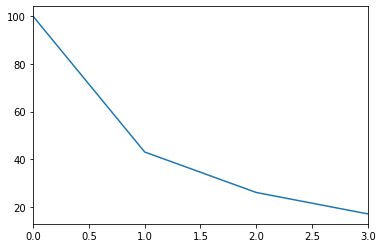

In [51]:
series.plot()

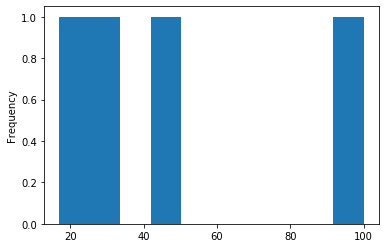

In [53]:
series.plot.hist()


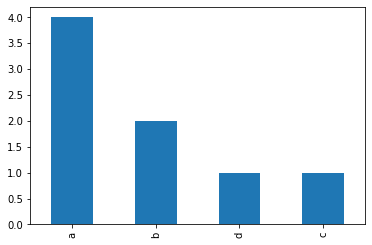

In [54]:
# The .value_counts method returns a series, so we can call .plot on the resulting series
pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts().plot.bar()

In [ ]:
# Any additional keyword arguments passed to pandas plotting methods will be passed along to the corresponding 
# matplotlib functions. In addition, we can use matplotlib the same way we have before to set titles, tweak axis 
# labels, etc.